In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Method 1: Random Number

In [2]:
# Neural Net
expected_outputs = np.asarray([[0.0],
                               [1.0],
                               [1.0],
                               [1.0],
                               [0.0]])

inputs = np.asarray([[0, 1, 0, 1, 0],
                     [0, 0, 1, 1, 0],
                     [1, 1, 0, 1, 0],
                     [1, 1, 1, 0, 1],
                     [0, 0, 0, 1, 0]])

in_num, out_num = len(inputs[0]), len(expected_outputs[0])

weights = np.random.randn(in_num, out_num) * 0.1

In [3]:
# Train
errors = []
epochs = 10_000

for _ in range(epochs):
    y = inputs @ weights
    error = y - expected_outputs
    error = np.sum(np.abs(error))

    if error < 0.03:
        print("Error under 3%")
        break
    else:
        weights = np.random.randn(in_num, out_num) * 0.1

    errors.append(error)


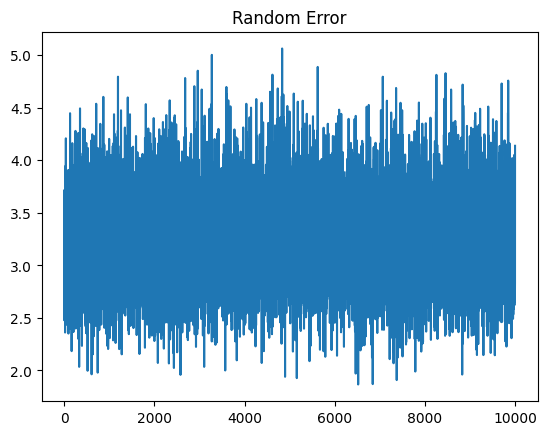

In [4]:
plt.figure(1)
plt.title("Random Error")
plt.plot(errors)

### Method 2: Evolutionary

In [5]:
# Neural Net
expected_outputs = np.asarray([[0.0],
                               [1.0],
                               [1.0],
                               [1.0],
                               [0.0]]) # USE THIS

inputs = np.asarray([[0, 1, 0, 1, 0],
                     [0, 0, 1, 1, 0],
                     [1, 1, 0, 1, 0],
                     [1, 1, 1, 0, 1],
                     [0, 0, 0, 1, 0]])

biases = np.ones([inputs.shape[0], 1])

inputs_with_bias = np.hstack((inputs, biases)) # USE THIS

in_num, out_num = len(inputs_with_bias[0]), len(expected_outputs[0])

weights = np.random.randn(in_num, out_num) * 0.1 # USE THIS

In [6]:
# Train
errors = []
epochs = 10_000

for _ in range(epochs):
    y = inputs_with_bias @ weights
    error = y - expected_outputs
    error = np.sum(np.abs(error))

    if error < 0.03:
        print("Error under 3%")
        break
    else:
        adjust_amount = np.random.randn(in_num, out_num) * 0.01
        child_weights = weights + adjust_amount

        child_y = inputs_with_bias @ child_weights
        child_error = child_y - expected_outputs
        child_error = np.sum(np.abs(child_error))

        if child_error < error:
            weights = child_weights

    errors.append(error)

Error under 3%


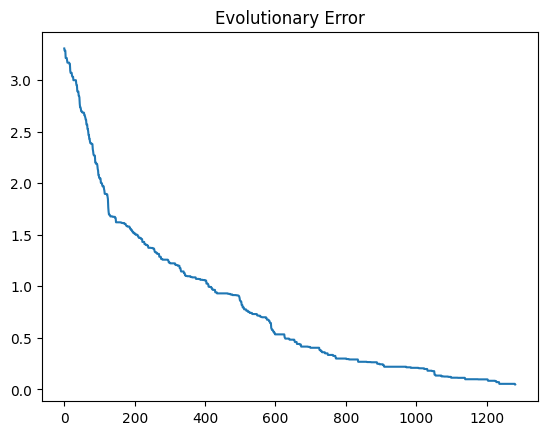

In [7]:
plt.figure(1)
plt.title("Evolutionary Error")
plt.plot(errors)

### Method 3: Gradient Descent

In [8]:
# Neural Net
expected_outputs = np.asarray([[0.0],
                               [1.0],
                               [1.0],
                               [1.0],
                               [0.0]]) # USE THIS

inputs = np.asarray([[0, 1, 0, 1, 0],
                     [0, 0, 1, 1, 0],
                     [1, 1, 0, 1, 0],
                     [1, 1, 1, 0, 1],
                     [0, 0, 0, 1, 0]])

biases = np.ones([inputs.shape[0], 1])

inputs_with_bias = np.hstack((inputs, biases)) # USE THIS

in_num = len(inputs_with_bias[0])
hidden_nodes_num = 15
out_num = len(expected_outputs[0])

weights0 = np.random.randn(in_num, hidden_nodes_num) * 0.1 # USE THIS
weights1 = np.random.randn(hidden_nodes_num, out_num) * 0.1 # USE THIS

In [9]:
# Train
errors = []
epochs = 5000

for _ in range(epochs):
    out = inputs_with_bias @ weights0
    activated = np.sin(out)
    y = activated @ weights1

    error = y - expected_outputs
    weights1 -= (activated.T @ error) * 0.01
    error = np.sum(np.abs(error))

    if error < 0.03:
        print("Error under 3%")
        break

    errors.append(error)

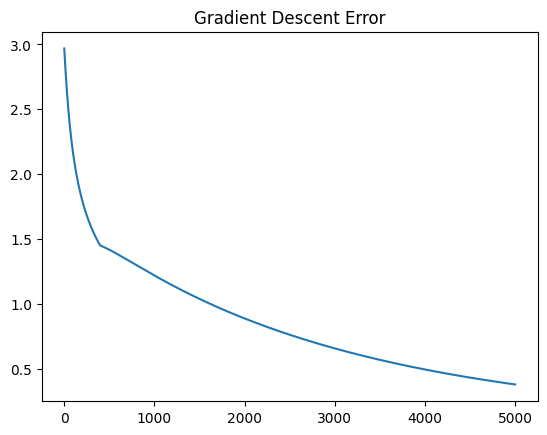

In [10]:
plt.figure(1)
plt.title("Gradient Descent Error")
plt.plot(errors)

### Artificial Neural Network (Numpy)

In [11]:
# Data
X = np.asarray([[-10], [-8], [-6], [-4],[-2],[0],[2], [4], [6], [8], [10]])
expected_y = X**2

In [12]:
# Neural Network
def get_weights(x_shape, y_shape):
    return np.random.randn(x_shape, y_shape) * 0.1

bias = np.ones([X.shape[0], 1])
X0 = np.hstack((X, bias))

w0 = get_weights(len(X0[0]), 20)
w1 = get_weights(20, 20)
w2 = get_weights(20, 15)
w3 = get_weights(15, 15)
w4 = get_weights(15, len(y[0]))

In [13]:
# Train
errors = []
epochs = 100_000
learning_rate = 0.00001

for _ in range(epochs):
    m0 = X0 @ w0; x1 = np.sin(m0)
    m1 = x1 @ w1; x2 = np.sin(m1)
    m2 = x2 @ w2; x3 = np.sin(m2)
    m3 = x3 @ w3; x4 = np.sin(m3)

    y = x4 @ w4

    e4 = (y - expected_y) * 1
    e3 = (e4 @ w4.T) * np.cos(m3)
    e2 = (e3 @ w3.T) * np.cos(m2)
    e1 = (e2 @ w2.T) * np.cos(m1)
    e0 = (e1 @ w1.T) * np.cos(m0)

    w0 -= (X0.T @ e0) * learning_rate
    w1 -= (x1.T @ e1) * learning_rate
    w2 -= (x2.T @ e2) * learning_rate
    w3 -= (x3.T @ e3) * learning_rate
    w4 -= (x4.T @ e4) * learning_rate

    e4 = np.sum(np.abs(e4))
    errors.append(e4)

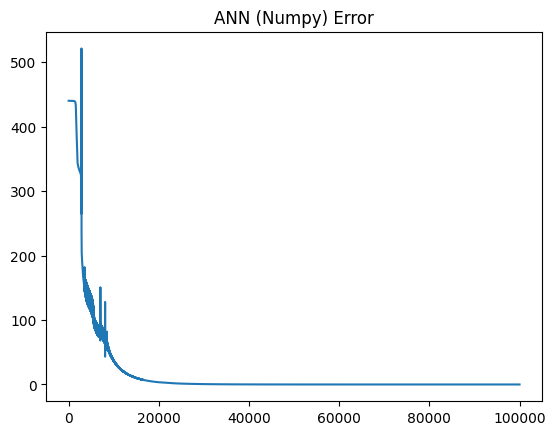

In [14]:
plt.figure(1)
plt.title("ANN (Numpy) Error")
plt.plot(errors)

### Artificial Neural Network (Pytorch)

In [15]:
import torch
import torch.nn as nn

In [16]:
# Data
X = np.asarray([[-10], [-8], [-6], [-4],[-2],[0],[2], [4], [6], [8], [10]])
expected_y = X**2

x0 = torch.tensor(X).float()
y0 = torch.tensor(expected_y).float()

In [17]:
class Model(nn.Module):
    def __init__(self, in_features, out_features) -> None:
        super().__init__()

        self.nn = nn.Sequential(
            nn.Linear(in_features, 5),
            nn.ReLU(),
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, out_features)
        )

    def forward(self, x):
        return self.nn(x)

In [18]:
model = Model(len(x0[0]), len(y0[0]))
model

Model(
  (nn): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
loss_fn

MSELoss()

In [20]:
# Train
errors = []
epochs = 100_000

for epoch in range(epochs):
    model.train()

    y_pred = model.forward(x0)
    loss = loss_fn(y_pred, y0)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    error = loss.item()
    errors.append(error)

    if epoch % 10_000 == 0:
        print(f'Epoch: {epoch} - Loss: {error}')

Epoch: 0 - Loss: 2841.096435546875
Epoch: 10000 - Loss: 1247.9998779296875
Epoch: 20000 - Loss: 1247.9998779296875
Epoch: 30000 - Loss: 1247.9998779296875
Epoch: 40000 - Loss: 1247.9998779296875
Epoch: 50000 - Loss: 1247.9998779296875
Epoch: 60000 - Loss: 1247.9998779296875
Epoch: 70000 - Loss: 1247.9998779296875
Epoch: 80000 - Loss: 1247.9998779296875
Epoch: 90000 - Loss: 1247.9998779296875


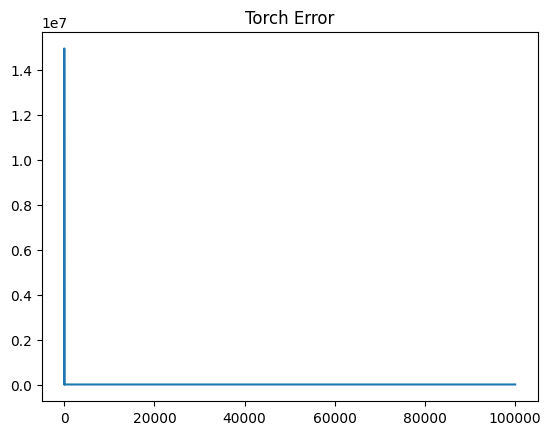

In [21]:
plt.figure(1)
plt.title("Torch Error")
plt.plot(errors)